<a href="https://colab.research.google.com/github/Soggeum/20242R0136COSE47402/blob/master/FinalProject/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Gymnasium

In [ ]:
!sudo apt-get install swig  # swig 설치
!pip install box2d gymnasium[box2d]

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  swig4.0
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,116 kB of archives.
After this operation, 5,542 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1,110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig all 4.0.2-1ubuntu1 [5,632 B]
Fetched 1,116 kB in 2s (729 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
de

# Lunar Lander Environment Initialization

In [ ]:
import gymnasium as gym

env = gym.make("LunarLander-v3", render_mode="human")
observation, info = env.reset()

episode_over = False
while not episode_over:
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)

    episode_over = terminated or truncated

env.close()

# Test

In [ ]:
!git clone https://github.com/juliankappler/lunar-lander.git
%cd lunar-lander

Cloning into 'lunar-lander'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 68 (delta 35), reused 30 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (68/68), 1.44 MiB | 16.95 MiB/s, done.
Resolving deltas: 100% (35/35), done.
/content/lunar-lander


# DQN

## Google Drive 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Git 설치

In [ ]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


## 레포지토리 복제

In [ ]:
!git clone https://github.com/juliankappler/lunar-lander.git

Cloning into 'lunar-lander'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 68 (delta 35), reused 30 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (68/68), 1.44 MiB | 20.21 MiB/s, done.
Resolving deltas: 100% (35/35), done.


## 필요한 library 설치

In [ ]:
pip install gymnasium numpy matplotlib stable-baselines3 torch torchvision pandas scipy tqdm seaborn Box2D

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 4.2 MB/s eta 0:00:00


# train and visualize agent.ipynb

In [ ]:
import gymnasium as gym
import pygame
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [ ]:
import agent_class as agent

## Initialize environment and agent

In [ ]:
# We first create the environment on which we will later train the agent
env = gym.make('LunarLander-v3')

# We need to know the dimensionality of the state space, as well as how many
# actions are possible
N_actions = env.action_space.n
observation, info = env.reset()
N_state = len(observation)

print('dimension of state space =',N_state)
print('number of actions =',N_actions)

dimension of state space = 8
number of actions = 4


In [ ]:
# We create an instance of the agent class.
# At initialization, we need to provide
# - the dimensionality of the state space, as well as
# - the number of possible actions

parameters = {'N_state':N_state, 'N_actions':N_actions}

my_agent = agent.dqn(parameters=parameters)
# to train via the actor-critic algorithm, use this line:
# my_agent = agent.actor_critic(parameters=parameters)

## Train agent

In [ ]:
# We train the agent on the LunarLander-v2 environment.
# Setting verbose=True allows us to follow the progress of the training

training_results = my_agent.train(environment=env,
                                verbose=True)

| episode | return          | minimal return      | mean return        |
|         | (this episode)  | (last 20 episodes)  | (last 20 episodes) |
|-----------------------------------------------------------------------
|     100 |     -322.738    |       -396.405      |      -152.051      |
|     200 |      -90.368    |       -198.546      |       -97.200      |
|     300 |      -67.049    |       -227.033      |       -69.871      |
|     400 |      -21.622    |       -172.480      |       -57.755      |
|     500 |      166.302    |       -143.933      |        -2.275      |
|     600 |     -108.638    |       -141.939      |        39.268      |
|     700 |       84.535    |       -118.907      |        72.633      |
|     800 |      245.135    |       -146.110      |       194.787      |
|     900 |      121.207    |        -48.563      |       189.955      |
|    1000 |      286.871    |        100.435      |       201.986      |
|    1100 |      268.901    |        -76.101      |

In [ ]:
# the method my_agent.train() from the previous cell returns a dictionary
# with training stats, namely:
# - duration of each episode during training,
# - return of each episode during training
# - the total number of training epochs at the end of each episode
# - the total number of steps simulated at the end of each episode

training_results.keys()

dict_keys(['episode_durations', 'epsiode_returns', 'n_training_epochs', 'n_steps_simulated', 'training_completed'])

## Plot training stats

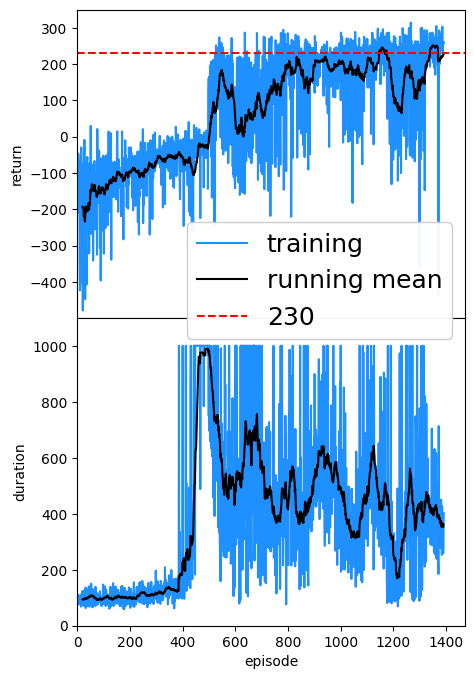

In [ ]:
# Plot both the return per episode and the duration per episode during
# training, together with their running average over 20 consecutive episodes

N = 20 # number of episodes for running average

def running_mean(x,N=20):
        x_out = np.zeros(len(x)-N,dtype=float)
        for i in range(len(x)-N):
                x_out[i] = np.mean(x[i:i+N+1])
        return x_out

def plot_returns_and_durations(training_results,filename=None):
    fig,axes = plt.subplots(2,1,figsize=(5,8))
    fig.subplots_adjust(hspace=0.0001)
    #
    # return as a function of episode
    ax = axes[0]
    x = training_results['epsiode_returns']
    t = np.arange(len(x)) + 1
    #
    ax.plot(t,x,label='training',color='dodgerblue',)
    # add running mean
    x = running_mean(x=x,N=N)
    t = np.arange(len(x)) + N
    ax.plot(t,x,color='black',label='running mean')
    #
    ax.axhline(230,ls='--',
               label='230',
                        color='red')
    #
    ax.set_ylim(-499,350)
    ax.set_xticks([])
    ax.set_xlim(0,len(t)+100)
    ax.set_xlabel(r'episode')
    ax.set_ylabel(r'return')
    #
    #
    ax = axes[1]
    x = training_results['episode_durations']
    t = np.arange(len(x)) + 1
    #
    ax.plot(t,x,label='training',color='dodgerblue',)
    # add running mean
    x = running_mean(x=x,N=N)
    t = np.arange(len(x)) + N
    ax.plot(t,x,color='black',label='running mean')
    #
    ax.axhline(1200,ls='--', # draw line outside of plot scale,
                label='230', # to get the red dotted line into the legend
                        color='red')
    #
    ax.set_ylim(0,1100)
    ax.set_xlim(0,len(t)+100)
    ax.set_xlabel(r'episode')
    ax.set_ylabel(r'duration')
    ax.legend(loc='upper right',bbox_to_anchor=(1.,1.35),
                                framealpha=0.95,
                        fontsize=18)
    #
    plt.show()
    if filename != None:
        fig.savefig(filename,bbox_inches='tight')
    plt.close(fig)

plot_returns_and_durations(training_results=training_results)

## Create gameplay video using trained agent

First we create a "live" video that pops up and shows Lunar Lander gameplay performed by the agent

In [ ]:
# There is the issue that the game window freezes when running gym games
# in jupyter notebooks, see https://github.com/openai/gym/issues/2433
# We here use the fix from that website, which is to use the following
# wrapper class:
class PyGameWrapper(gym.Wrapper):
    def render(self, **kwargs):
        retval = self.env.render( **kwargs)
        for event in pygame.event.get():
            pass
        return retval

In [ ]:
# Create a wrapped environment
env = PyGameWrapper(gym.make('LunarLander-v3',render_mode='human'))

N_episodes = 20

result_string = 'Run {0}: duration = {1}, total return = {2:7.3f}'

for j in range(N_episodes):
    state, info = env.reset()

    total_reward = 0
    for i in itertools.count():
        #env.render()

        action = my_agent.act(state)
        state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        total_reward += reward

        if done:
            print(result_string.format(j+1,i+1,total_reward))
            break

env.close()

Run 1: duration = 233, total return = 272.992
Run 2: duration = 225, total return = 266.386
Run 3: duration = 252, total return = 276.862
Run 4: duration = 299, total return = 288.977
Run 5: duration = 235, total return = 234.496
Run 6: duration = 232, total return = 269.240
Run 7: duration = 305, total return = 285.769
Run 8: duration = 296, total return = 283.943
Run 9: duration = 253, total return = 276.154
Run 10: duration = 251, total return = 269.303
Run 11: duration = 276, total return = 246.844
Run 12: duration = 242, total return = 248.106
Run 13: duration = 250, total return = 229.652
Run 14: duration = 306, total return = 231.012
Run 15: duration = 291, total return = 275.736
Run 16: duration = 302, total return = 299.510
Run 17: duration = 255, total return = 259.259
Run 18: duration = 326, total return = 285.116
Run 19: duration = 295, total return = 274.316
Run 20: duration = 252, total return = 258.943


We also create a video file containing 20 games played by the agent

In [ ]:
from gymnasium.wrappers import RecordEpisodeStatistics, RecordVideo

env = gym.make('LunarLander-v3', render_mode="rgb_array")
video = RecordVideo(env, './my_video.mp4'.format())

N_episodes = 20

result_string = 'Run {0}: duration = {1}, total return = {2:7.3f}'

for j in range(N_episodes):
    state, info = env.reset()

    total_reward = 0
    for i in itertools.count():
        video.capture_frame()

        action = my_agent.act(state)
        state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        total_reward += reward

        if done:
            print(result_string.format(j+1,i+1,total_reward))
            break

video.close()
env.close()

AttributeError: 'RecordVideo' object has no attribute 'capture_frame'

In [ ]:
import gymnasium as gym
from gymnasium.wrappers import RecordEpisodeStatistics, RecordVideo

num_eval_episodes = 20

env = gym.make("LunarLander-v3", render_mode="rgb_array")  # replace with your environment
env = RecordVideo(env, video_folder="my_video", name_prefix="eval",
                  episode_trigger=lambda x: True)

env = RecordEpisodeStatistics(env, buffer_length=num_eval_episodes)

for episode_num in range(num_eval_episodes):
    obs, info = env.reset()

    episode_over = False
    while not episode_over:
        action = my_agent.act(state)
        #action = env.action_space.sample()  # replace with actual agent
        obs, reward, terminated, truncated, info = env.step(action)

        episode_over = terminated or truncated
env.close()

print(f'Episode time taken: {env.time_queue}')
print(f'Episode total rewards: {env.return_queue}')
print(f'Episode lengths: {env.length_queue}')

Episode time taken: deque([0.186139, 0.247442, 0.21668, 0.248991, 0.266838, 0.275488, 0.19907, 0.206992, 0.178439, 0.218499, 0.207569, 0.271494, 0.186909, 0.19305, 0.26819, 0.243772, 0.254812, 0.286942, 0.285244, 0.360474], maxlen=20)
Episode total rewards: deque([-127.68588325778998, -162.6850875519665, -182.6765934386924, -167.37877429238716, -175.9704308527701, -153.72913122326395, -118.267433206524, -126.43312982533291, -104.3874905469489, -166.43522058218613, -143.81419767556687, -129.3875151366948, -155.0110349730276, -170.52381362085916, -157.31537246664158, -142.77565002625636, -134.1170855640746, -120.95443198690273, -133.05272809293325, -180.08326203171833], maxlen=20)
Episode lengths: deque([61, 76, 70, 78, 89, 92, 65, 69, 59, 68, 68, 86, 62, 62, 87, 73, 53, 64, 63, 79], maxlen=20)
